In [2]:
# parent 폴더 접근 경로 설정
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

# .py 파일이 아닌 .ipynb 파일 접근하는 모듈
import import_ipynb 

# name 못찾을경우 pip3 uninstall pyzmq 후 재 설치 pip3 install pyzmq
from mysqldb.mysqlhelper import *

import pandas as pd 
import matplotlib.pyplot as plt

importing Jupyter notebook from /home/user/PythonHome/myenv/mysqldb/mysqlhelper.ipynb


In [7]:
#DB 연결
helper = dbhelper('127.0.0.1', 'yso1983', '123456', 'lotto')

sql = """select drwtNo1,drwtNo2,drwtNo3,drwtNo4,drwtNo5,drwtNo6,bnusNo from lotto_info order by drwno asc"""

result = pd.DataFrame(helper.getData(sql,None, True))
result.index += 1
result

,drwtNo1,drwtNo2,drwtNo3,drwtNo4,drwtNo5,drwtNo6,bnusNo
1,10,23,29,33,37,40,16
2,9,13,21,25,32,42,2
3,11,16,19,21,27,31,30
4,14,27,30,31,40,42,2
5,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...
952,4,12,22,24,33,41,38
953,7,9,22,27,37,42,34
954,1,9,26,28,30,41,32
955,4,9,23,26,29,33,8


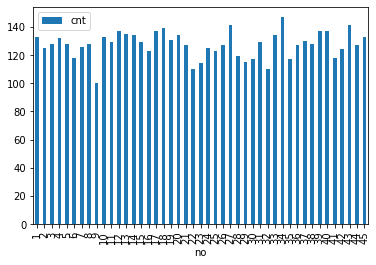

In [34]:
sql = """select no, count(no) as cnt from 
        (
            select drwtNo1 as no from lotto_info 
            union all
            select drwtNo2 as no from lotto_info
            union all
            select drwtNo3 as no from lotto_info
            union all
            select drwtNo4 as no from lotto_info
            union all
            select drwtNo5 as no from lotto_info
            union all
            select drwtNo6 as no from lotto_info
            #union all
            #select bnusNo as no from lotto_info
        ) x
        group by x.no
        order by x.no asc
        """

result2 = pd.DataFrame(helper.getData(sql, None, True))

result2.plot(kind = 'bar', x = 'no', y = 'cnt')
#plt.barh(x, y)
plt.show()


In [35]:
import numpy as np

result2.index = np.arange(1, len(result2) + 1)
result2.sort_values(by=['cnt'], axis=0, ascending=False)

,no,cnt
34,34,147
43,43,141
27,27,141
18,18,139
40,40,137
39,39,137
17,17,137
12,12,137
13,13,135
14,14,134


In [36]:
import math

func = lambda x : x / x.sum() * 100
result3 = result2
del result3["no"]
result3.apply(func, axis=0)

,cnt
1,2.318689
2,2.179219
3,2.231520
4,2.301255
5,2.231520
6,2.057183
7,2.196653
8,2.231520
9,1.743375
10,2.318689
